# Hypothesis Test - Lab

## Introduction

In this lab, you'll have the opportunity to decide to pick the variables that you want to perform one and two sample t-tests.

## Objectives

You will be able to:

* Construct and interpret a confidence interval for a single mean
* Perform a hypothesis test for a single mean
* Construct and interpret a confidence interval for two independent means
* Perform a hypothesis test for two independent means


## The Data: Last Words of Death Row Inmates

On Kaggle there is a famous data set of *[Last Words of Death Row Inmates](https://www.kaggle.com/datasets/mykhe1097/last-words-of-death-row-inmates)*. While this data set is often used for natural language processing, we'll use the non-text data for statistical inference on one and two means using the t-distribution.

### Data Dictionary

The dataset consists of 545 observations with 21 variables. They are:

* `Execution`: The order of execution, numeric.
* `LastName`: Last name of the offender, character.
* `FirstName`: First name of the offender, character.
* `TDCJNumber`: TDCJ Number of the offender, numeric.
* `Age`: Age of the offender, numeric.
* `Race`: Race of the offender, categorical : Black, Hispanic, White, Other.
* `CountyOfConviction`: County of conviction, character.
* `AgeWhenReceived`: Age of offender when received, numeric.
* `EducationLevel`: Education level of offender, numeric.
* `NativeCounty`: Native county of offender, categorical : 0 = Within Texas, 1= Outside Texas.
* `PreviousCrime`: Whether the offender committed any crime before, categorical: 0= No, 1= Yes.
* `Codefendants`: Number of co-defendants, numeric.
* `NumberVictim`: Number of victims, numeric.
* `WhiteVictim`, `HispanicVictim`, `BlackVictim`, `VictimOtherRace` `FemaleVictim`, `MaleVictim`: Number of victims with specified demographic features, numeric.
* `LastStatement`: Last statement of offender, character.

The [data file](https://github.com/learn-co-curriculum/dsc-hypothesis-testing-ent/blob/main/data/texas.csv) that we'll be using has the first 20 variables, i.e. we're excluding the `LastStatement` variable.

*N.B.*: Note this data is from 1982 - 2017 and for that time period the data is exhaustive.

## Preliminary Steps

As usual, begin with importing the Python libraries that you will need. Then bring in the data and explore it.

You'll likely want to use `scipy.stats`. If you want to use `confidence_interval(confidence_level=0.95)` with [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), then you need to have `scipy` version 1.11.0.

In [7]:

# Only do this if necessary
#! pip install scipy==1.11.0

In [8]:

__requires__= 'scipy==11.1.0'

# Bring in germane libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

scipy.__version__

'1.13.1'

In [9]:
# Read data into dataframe
df = pd.read_csv('data/texas.csv', index_col=0)

Now that you have brought in the data. Consider these or similar commands to get a feel for the data.
* `.info()`
* `.head()`



In [11]:
# Get DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, Cardenas to Brooks, Jr.
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FirstName           383 non-null    object
 1   TDCJNumber          383 non-null    int64 
 2   Age                 383 non-null    int64 
 3   Race                383 non-null    object
 4   CountyOfConviction  383 non-null    object
 5   AgeWhenReceived     383 non-null    int64 
 6   EducationLevel      383 non-null    int64 
 7   NativeCounty        383 non-null    int64 
 8   PreviousCrime       383 non-null    int64 
 9   Codefendants        383 non-null    int64 
 10  NumberVictim        383 non-null    int64 
 11  WhiteVictim         383 non-null    int64 
 12  HispanicVictim      383 non-null    int64 
 13  BlackVictim         383 non-null    int64 
 14  VictimOther.Races   383 non-null    int64 
 15  FemaleVictim        383 non-null    int64 
 16  MaleVictim      

In [12]:
# head
df.head()

,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
LastName,,,,,,,,,,,,,,,,,
Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28,11,1,0,0,1,0,1,0,0,1,0
Pruett,Robert,999411,38,White,Bee,22,8,0,1,0,1,1,0,0,0,0,1
Preyor,Taichin,999494,46,Black,Bexar,34,10,0,0,0,1,1,0,0,0,0,1
Bigby,James,997,61,White,Tarrant,36,9,0,1,0,1,1,0,0,0,0,1
Ruiz,Rolando,999145,44,Hispanic,Bexar,22,10,0,1,4,1,0,1,0,0,1,0


In [100]:
df.NativeCounty.value_counts()

NativeCounty
0    239
1    143
6      1
Name: count, dtype: int64

### Preprocessing

While there are a number of preprocessing steps you may choose to make, at the very least you should do the following.

Based on the data dictionary and how the data is interpreted by Numpy, convert any non-numeric data into the proper form. Verify that your code worked correctly.

In [15]:
# Use the map function to change the two variables
def map_string_feature(dataframe, feature):
    dict = {}
    index = 0
    for value in dataframe[feature].unique():
        dict[value] = index
        index += 1
    out_df = df[feature].map(dict)
    out_dict = {y: x for x, y in dict.items()}
    return out_df, out_dict

df['Race'], race_dict = map_string_feature(df, 'Race')
df['CountyOfConviction'], county_dict = map_string_feature(df, 'CountyOfConviction')

In [16]:
# Verify this was done correctly
# head
df.head()

,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
LastName,,,,,,,,,,,,,,,,,
Cardenas,Ruben,999275,47,0,0,28,11,1,0,0,1,0,1,0,0,1,0
Pruett,Robert,999411,38,1,1,22,8,0,1,0,1,1,0,0,0,0,1
Preyor,Taichin,999494,46,2,2,34,10,0,0,0,1,1,0,0,0,0,1
Bigby,James,997,61,1,3,36,9,0,1,0,1,1,0,0,0,0,1
Ruiz,Rolando,999145,44,0,2,22,10,0,1,4,1,0,1,0,0,1,0


In [17]:
# Verify this was done correctly
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, Cardenas to Brooks, Jr.
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FirstName           383 non-null    object
 1   TDCJNumber          383 non-null    int64 
 2   Age                 383 non-null    int64 
 3   Race                383 non-null    int64 
 4   CountyOfConviction  383 non-null    int64 
 5   AgeWhenReceived     383 non-null    int64 
 6   EducationLevel      383 non-null    int64 
 7   NativeCounty        383 non-null    int64 
 8   PreviousCrime       383 non-null    int64 
 9   Codefendants        383 non-null    int64 
 10  NumberVictim        383 non-null    int64 
 11  WhiteVictim         383 non-null    int64 
 12  HispanicVictim      383 non-null    int64 
 13  BlackVictim         383 non-null    int64 
 14  VictimOther.Races   383 non-null    int64 
 15  FemaleVictim        383 non-null    int64 
 16  MaleVictim      

### EDA

Now perform Exploratory Data Analysis of at least three variables of your choosing. You should look at both descriptive statistics and visualizations.

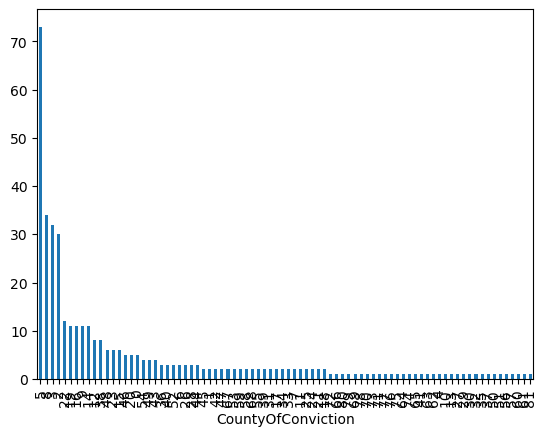

In [19]:
# EDA code sample
# describe
df['CountyOfConviction'].value_counts().plot(kind="bar")
plt.show()

In [76]:
print(county_dict[df['CountyOfConviction'].value_counts()[0]])

# Harris County has significantly more convictions than the other counties

Harris


<Axes: >

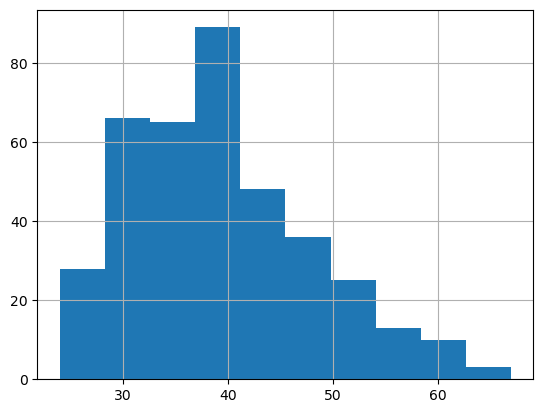

In [82]:
# EDA code sample
# Plot age (use histogram)
df['Age'].hist()

## Statistical Inference

### One mean

Now pick a variable that you can perform statistical inference on a single sample mean using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What is the variable you chose?
*   How do you know it is appropriate for statistical inference on a single mean using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?



In [27]:
# Responses to questions
# - Age
# - The sample appears to follow a somewhat normal distribution
# - 95%
# - HA: The average age of the death row inmate population is less than 40
#   H0: The average age of the death row inmate population is not less than 40
# - alpha = 0.05

#### Confidence Interval

Now construct a confidence interval for your chosen variable at the level of confidence you chose above.

In [116]:
# Construct the confidence interval
confidence_age = stats.ttest_1samp(df.Age, popmean=df['Age'].mean())
confidence_age.confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=38.503965849221714, high=40.24277044320648)

Interpret the confidence interval in the code block below (commented out).

In [32]:
# Interpretation
# We can expect with 95% certainty that our population mean lies within the interval: (38.503965849221714, 40.24277044320648)

#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [96]:
# Perform the hypothesis test
t_stat, p_value = stats.ttest_1samp(df['Age'], 40, alternative='less')
print(t_stat, p_value)

-1.4171569207339607 0.07862605617087129


Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [37]:
# Conclusion
"""
Because our p-value is greater than alpha (0.05), we can reject the null hypothesis (with 95% confidence), that the average age of death row
inmates is not less than 40.
"""

### Two means

Now pick a variable that you can perform statistical inference on two (independent) sample means using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What are the variables you chose?
*   How do you know it is appropriate for statistical inference on two (independent)means using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?

In [104]:
age_native_df[''] = df.loc[df['NativeCounty'] == 1] 
age_non_native_df = df.loc[df['NativeCounty'] == 0]

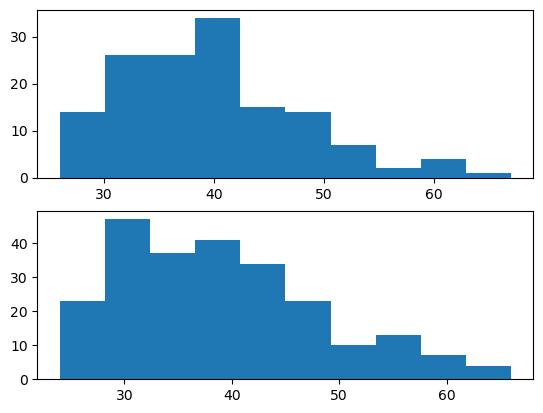

In [110]:
fig, ax = plt.subplots(2)
ax[0].hist(age_native_df['Age'])
ax[1].hist(age_non_native_df['Age'])
plt.show()

In [41]:

# Responses to questions
# - Age, NativeCounty
# - NativeCountry is a binary value, allowing us to easily split the population into two groups
# - 95%
# - HA: The average age of a death row inmate incarcerated in their home country is the same than non natives
# - H0: The average age of a death row inmate incarcerated in their home country is not the same as non natives
# - Alpha = 0.05

# Response snippet: Number of victims by previous crime (Yes or No)

#### Confidence Interval

Now construct a confidence interval for your chosen variables at the level of confidence you chose above.

In [128]:
# Construct the confidence interval
t_test = stats.ttest_ind(age_native_df['Age'], age_non_native_df['Age'])
t_test.confidence_interval(confidence_level=0.95)



ConfidenceInterval(low=-0.9107555775724439, high=2.6900808548056707)

Interpret the confidence interval in the code block below (commented out).

#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [132]:
# Perform the hypothesis test
t_stat, p_value = stats.ttest_ind(age_native_df['Age'], age_non_native_df['Age'])

p_value

0.33186987412959656

Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [51]:
# Conclusion
# Our p-value is much larger than our alpha, therefore we must reject our null hypothesis that
# the average age of a death row inmate incarcerated in their home country is not the same as non natives

## Summary

Using a multivariate data set, you were able to pick variables to perform one and two sample t confidence intervals and t-tests.